In [1]:
! git clone https://github.com/tlapinsk/colab-examples.git

Cloning into 'colab-examples'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 64995 (delta 1), reused 7 (delta 1), pack-reused 64986
Receiving objects: 100% (64995/64995), 1.39 GiB | 50.31 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Checking out files: 100% (65777/65777), done.


In [2]:
! ls

colab-examples	sample_data


In [16]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
from skimage import io, transform
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
import random
import time
from sklearn.model_selection import train_test_split
seed = 333
np.random.seed(seed)

import os
print(os.listdir("colab-examples/data"))

['dogs-vs-cats', 'animals-10', '.DS_Store']


In [4]:
# path to images
img_dir = "colab-examples/data/animals-10"

# list all available images type
print(os.listdir(img_dir))

['train']


In [10]:
# Split into dog versus cat categories (0, 1)
filenames = os.listdir("colab-examples/data/animals-10/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'butterfly':
        categories.append(0)
    elif category == 'cat':
        categories.append(1)
    elif category == 'cow':
        categories.append(2)
    elif category == 'dog':
        categories.append(3)
    elif category == 'elephant':
        categories.append(4)
    elif category == 'hen':
        categories.append(5)
    elif category == 'horse':
        categories.append(6)
    elif category == 'sheep':
        categories.append(7)
    elif category == 'spider':
        categories.append(8)
    elif category == 'squirrel':
        categories.append(9)
    else:
        categories.append(10)

        
print(len(filenames))
print(len(categories))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Preview changes
df.head()

28266
28266


,filename,category
0,cow.OIP-MK5Ueu6d1BR0_CxBV6AulAHaFj.jpeg,2
1,dog.OIP-Di5ZmDj5ImwVpJ0Cea1PMwHaFj.jpeg,3
2,sheep.OIP-JZfjKKG9PjKU4eUGupDrBAHaKj.jpeg,7
3,elephant.ea37b10821f5093ed1584d05fb1d4e9fe777e...,4
4,butterfly.OIP-1k5CHCKSejY2wDB3Tx0dXQHaFq.jpeg,0


In [11]:
# Preview changes
df.tail()

,filename,category
28261,hen.OIP-21mCOWjpLO0YAX-964WlEAHaEo.jpeg,5
28262,squirrel.OIP-dnSMK8Sf4kh6u7Ept4v4mQHaE7.jpeg,9
28263,hen.OIP-fvmszP9ovj_Rh4mCW-mAOAHaEK.jpeg,5
28264,hen.OIP-OBcUXjpaWiy17mSNpLBopAHaHc.jpeg,5
28265,horse.OIP-sZZLWpFtgLBoxgd5k15l1wHaE5.jpeg,6


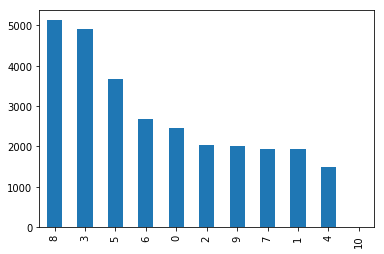

In [12]:
# Check out totals in a bar graph
df['category'].value_counts().plot.bar()

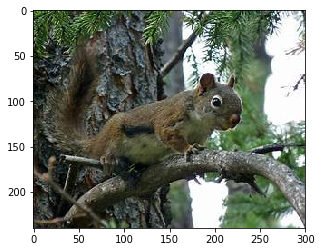

In [17]:
# Random sample image
sample = random.choice(filenames)
image = load_img("colab-examples/data/animals-10/train/"+sample)
plt.imshow(image)